<frozen importlib._bootstrap>:228: RuntimeWarning: compiletime version 3.8 of module 'pynestkernel' does not match runtime version 3.9
/usr/lib/python3.8/dist-packages/nest/lib/hl_api_helper.py:127: UserWarning:
ResetNetwork is deprecated and will be removed in NEST 3.0.


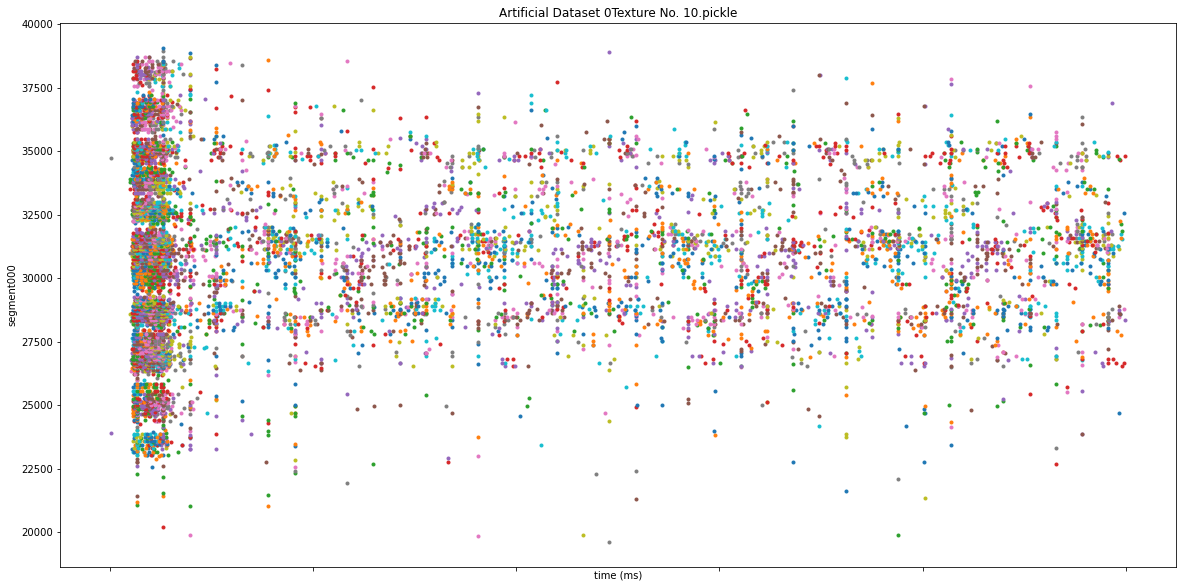

In [1]:
# Import libraries
import nest
import pyNN.nest as sim
from pyNN.parameters import Sequence
#from pyNN.models import IzhikevichType
import numpy
import matplotlib.pyplot as plt


# Reset NEST kernal
nest.ResetKernel()  # Reset kernal to prevent errors

# Setup connection from pyNN to NEST backend
sim.setup(timestep=1.0)

# Path to file containing spike timings
FILE_NAME = "Artificial Dataset 0Texture No. 0.pickle"
DATA_PATH = "/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/datasets/TacTip_NM/Reduced/" + FILE_NAME


# Define network
N = 19600   # Number of input neurons
run_time = 300.0

# Input layer of izhikevich neurons
#input_layer = nest.Create("izhikevich", N)
#input_layer = sim.Population(N, sim.Izhikevich())

# Import and flatten the dataset for use in the network
spike_times = numpy.load(DATA_PATH, allow_pickle=True)
spks = spike_times.reshape(-1)

timings = []

for x in spks:
    timings.append(Sequence(x))

def build_spike_sequences(spikes): # period, duration, n, delta_t
    """
    Return a spike time generator for `n` neurons (spike sources), where
    all neurons fire with the same period, but neighbouring neurons have a relative
    firing time difference of `delta_t`.
    """

    def spike_time_gen(i):
        """Spike time generator. `i` should be an array of indices."""
        #print([Sequence(numpy.arange(period + j * delta_t, duration, period)) for j in (i - n // 2)])
        #return [Sequence(numpy.arange(period + j * delta_t, duration, period)) for j in (i - n // 2)]
        #print([Sequence(spikes[j]) for j in i])
        return [Sequence(spikes[j]) for j in i]        

    return spike_time_gen

#print(build_spike_sequences(timings))
#spike_sequence_generator = build_spike_sequences(firing_period, t_stop, N, delta_t)
spike_sequence_generator = build_spike_sequences(timings)
p1 = sim.Population(N, sim.SpikeSourceArray(spike_times=spike_sequence_generator))
p1.record(['spikes'])

# Run simulation
sim.run(run_time)


data = p1.get_data()  # Retrieve data from simulation
sim.end()  # End simulation and begin data processing

# Set figure size
plt.rcParams["figure.figsize"] = (20,10)

# Plot spike trains function taken from PyNN examples
# data will contain segments of data depending on how many times the sim has been run
# Usually this will be 1 in this test case
def plot_spiketrains(segment):
    for spiketrain in segment.spiketrains:
        y = numpy.ones_like(spiketrain) * spiketrain.annotations['source_id']
        plt.plot(spiketrain, y, '.')
        plt.ylabel(segment.name)
        plt.xlabel("time (ms)")
        plt.title(FILE_NAME)
        plt.setp(plt.gca().get_xticklabels(), visible=False)
        #print(spiketrain)

plot_spiketrains(data.segments[0])
#plt.savefig("/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/graphs/Spike_trains/" + FILE_NAME + ".eps")
plt.savefig("/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/graphs/Spike_trains_short/" + FILE_NAME + str(run_time) + "ms.eps")
plt.show()
